In [37]:
#Dan's tester for https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#Follows code and includes download workaround for test set.

#load libraries

import torch
import torchvision
import torchvision.transforms as transforms
import os
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

print("done")

done


In [38]:
#load dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

print("done")

done


In [39]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print("done")

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
done


In [41]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#debug use
print("done")

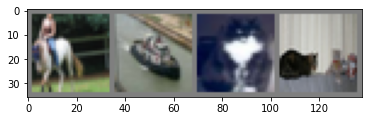

horse  ship   cat   cat
done


In [43]:
#show images



# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#debug use
print("done")

In [45]:
#define and create neural network function




class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#debug use
print("done")

done


In [46]:
#define loss function



criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#debug use
print("done")

done


In [47]:
#train neural network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.241
[1,  4000] loss: 1.957
[1,  6000] loss: 1.717
[1,  8000] loss: 1.602
[1, 10000] loss: 1.520
[1, 12000] loss: 1.466
[2,  2000] loss: 1.402
[2,  4000] loss: 1.388
[2,  6000] loss: 1.352
[2,  8000] loss: 1.306
[2, 10000] loss: 1.294
[2, 12000] loss: 1.275
Finished Training


In [48]:
#save trained model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#debug use
print("done")

done


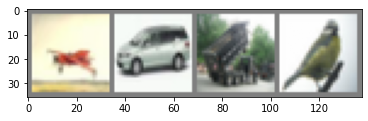

GroundTruth:  plane   car truck  bird
done


In [49]:
#double check clean label images

ataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#debug use
print("done")

In [50]:
#create function to process image through NN

outputs = net(images)

#debug use
print("done")



done


In [51]:
#Process noisy labels from above


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

#debug use
print("done")

Predicted:   deer   car truck  bird
done


In [52]:
#process and print all the whole set

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))
    
#debug use
print("done")

Accuracy for class plane is: 59.6 %
Accuracy for class car   is: 64.4 %
Accuracy for class bird  is: 36.4 %
Accuracy for class cat   is: 29.5 %
Accuracy for class deer  is: 52.6 %
Accuracy for class dog   is: 61.9 %
Accuracy for class frog  is: 59.2 %
Accuracy for class horse is: 67.1 %
Accuracy for class ship  is: 68.0 %
Accuracy for class truck is: 46.8 %
done
